# From KAGGLE code

https://www.kaggle.com/nilanml/how-to-get-into-graduate-school

## Prepare data

**Graduate Admissions Dataset**

This dataset is created by **Mohan S Acharya** to estimate chances of graduate admission from an Indian perspective. Our analysis will help us in understand what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

Lets load the dataset and take a look at it

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/My Drive/Data/Kaggle/Graduate Admission/Admission_Predict.csv')
print(df.shape)
df.head()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

Now, let us drop the irrelevant column and check if there are any null values in the dataset

In [4]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## EDA

Lets see the distribution of the variables of graduate applicants.

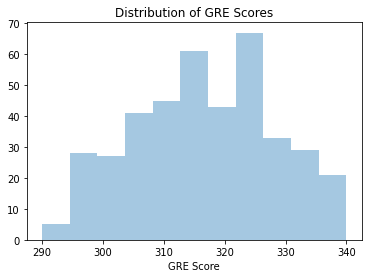

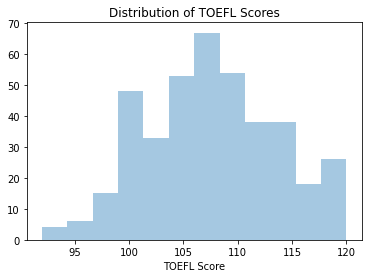

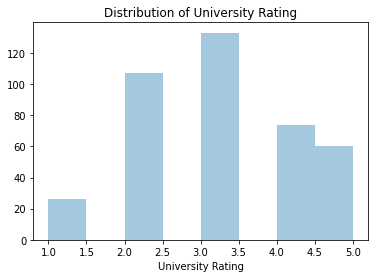

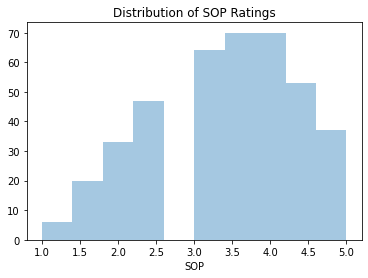

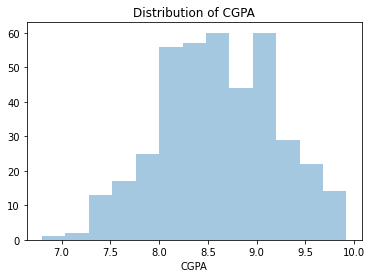

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

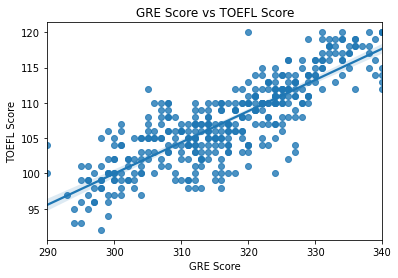

In [6]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

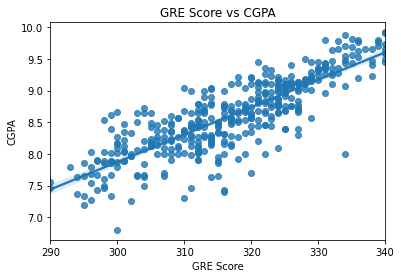

In [7]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

In [13]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


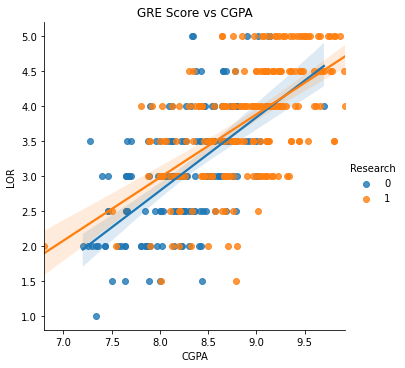

In [8]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

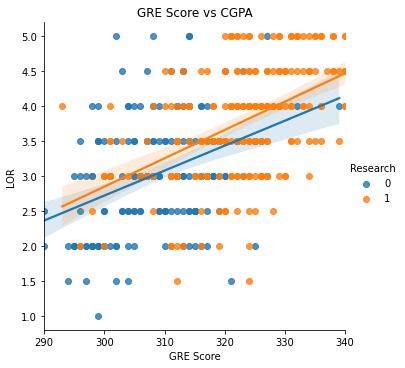

In [14]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

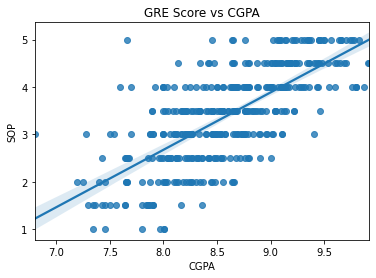

In [15]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

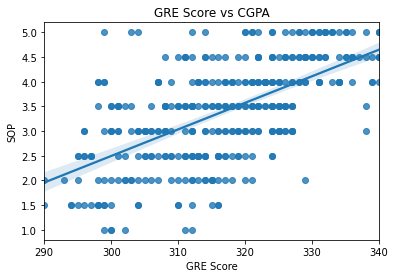

In [16]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Similary, GRE Score and CGPA is only slightly related

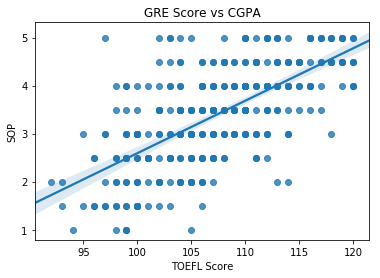

In [ ]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

**Correlation among variables**

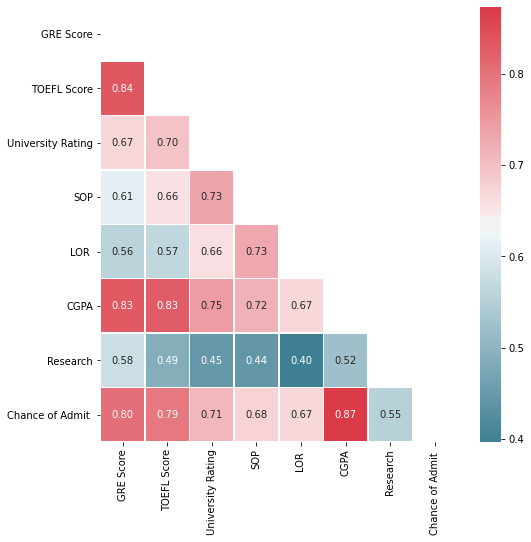

In [17]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Build model

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

Lets use a bunch of different algorithms to see which model performs better

In [ ]:
#!pip install catboost

In [33]:
import time
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score

models = [['DecisionTree',DecisionTreeRegressor()],
           ['Linear Regression', LinearRegression()],
           ['RandomForest',RandomForestRegressor()],
           ['KNeighbours', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM', SVR()],
           ['AdaBoostRegressor', AdaBoostRegressor()],
           ['GradientBoostingRegressor ', GradientBoostingRegressor()],
           ['Xgboost ', XGBRegressor()],
           ['CatBoost ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso ', Lasso()],
           ['Ridge ', Ridge()],
           ['BayesianRidge ', BayesianRidge()],
           ['ElasticNet ', ElasticNet()],
           ['HuberRegressor ', HuberRegressor()]]

print("Results...")

name_=[]
rmse_=[]
r2_=[]
time_=[]
for name,model in models:
  start=time.time()
  model = model
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  rmse=np.sqrt(mean_squared_error(y_test, predictions))
  r2=r2_score(y_test, predictions)
  end=time.time()
  time_cal=end - start

  time_.append(time_cal)
  name_.append(name)
  rmse_.append(rmse)
  r2_.append(r2)
  
  
  print('%s rmse: %0.3f r2: %0.3f time: %0.2f' % (name,rmse,r2,time_cal) )

Results...
DecisionTree rmse: 0.091 r2: 0.625 time: 0.01
Linear Regression rmse: 0.065 r2: 0.811 time: 0.00
RandomForest rmse: 0.072 r2: 0.768 time: 0.19
KNeighbours rmse: 0.083 r2: 0.687 time: 0.00
SVM rmse: 0.082 r2: 0.698 time: 0.01
AdaBoostRegressor rmse: 0.080 r2: 0.708 time: 0.07
GradientBoostingRegressor  rmse: 0.066 r2: 0.801 time: 0.06
[08:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost  rmse: 0.068 r2: 0.791 time: 0.03
CatBoost  rmse: 0.072 r2: 0.769 time: 0.72
Lasso  rmse: 0.131 r2: 0.221 time: 0.00
Ridge  rmse: 0.065 r2: 0.811 time: 0.00
BayesianRidge  rmse: 0.065 r2: 0.810 time: 0.00
ElasticNet  rmse: 0.098 r2: 0.566 time: 0.00
HuberRegressor  rmse: 0.069 r2: 0.786 time: 0.03


In [34]:
df_results_val=pd.DataFrame(list(zip(name_,rmse_,r2_,time_)),
                  columns=['Names','rmse','r2','time'])
df_results_val=df_results_val.sort_values(by='rmse',ascending=True)
df_results_val

,Names,rmse,r2,time
1,Linear Regression,0.064733,0.810959,0.004505
10,Ridge,0.064800,0.810570,0.003209
11,BayesianRidge,0.064896,0.810004,0.003832
6,GradientBoostingRegressor,0.066412,0.801029,0.055761
7,Xgboost,0.068133,0.790579,0.025350
13,HuberRegressor,0.068849,0.786154,0.025948
8,CatBoost,0.071531,0.769171,0.722786
2,RandomForest,0.071640,0.768469,0.185282
5,AdaBoostRegressor,0.080436,0.708122,0.073002
4,SVM,0.081807,0.698084,0.005446


Something as simple as Linear Regression performs the best in this case, which proves that complicated models doesnt always mean better results. There are situations when simple models are much better suited

**Generate Feature Importances**

In [35]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)


**Visualize Feature Importances**

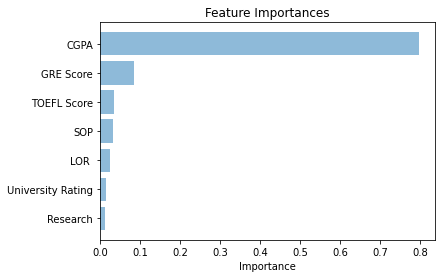

In [36]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Clearly, CGPA is the most factor for graduate admissions followed by GRE Score.

Thank You for reading my work. If you like it, please **UPVOTE**. It will motivate me to keep adding content and share with you guys.

# Pytorch Deep learning

## Get data

In [48]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv('/content/drive/My Drive/Data/Kaggle/Graduate Admission/Admission_Predict.csv')
print(df.shape)
df.head()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [42]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

## Prepare data for Pytorch 

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, 
                                                          random_state=2020)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  test_size=0.1, random_state=2020)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(400, 7) (400,)
(288, 7) (288,)
(32, 7) (32,)
(80, 7) (80,)


In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_train.shape, y_train.shape)

(288, 7) (288,)


In [49]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

In [50]:
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [51]:
print(train_dataset.X_data.shape, train_dataset.y_data.shape) # __init__ 
print(len(train_dataset)) # __len__ return len X_data

torch.Size([288, 7]) torch.Size([288])
288


## Neural Network

In [52]:
EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)

In [53]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [54]:
class MultipleRegression(nn.Module):
  def __init__(self, num_features):
      super(MultipleRegression, self).__init__()
      
      self.layer_1 = nn.Linear(num_features, 16)
      self.layer_2 = nn.Linear(16, 32)
      self.layer_3 = nn.Linear(32, 16)
      self.layer_out = nn.Linear(16, 1)
      
      self.relu = nn.ReLU()
  def forward(self, inputs):
      x = self.relu(self.layer_1(inputs))
      x = self.relu(self.layer_2(x))
      x = self.relu(self.layer_3(x))
      x = self.layer_out(x)
      return (x)
  def predict(self, test_inputs):
      x = self.relu(self.layer_1(test_inputs))
      x = self.relu(self.layer_2(x))
      x = self.relu(self.layer_3(x))
      x = self.layer_out(x)
      return (x)

In [55]:
# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [56]:
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)

MultipleRegression(
  (layer_1): Linear(in_features=7, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [57]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

## Train and test model

In [58]:
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
  # TRAINING
  train_epoch_loss = 0 # After every epoch, we’ll print out the loss and reset it back to 0.
  model.train() # model.train() tells PyTorch that you’re in training mode.
  for X_train_batch, y_train_batch in train_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
       #Since the backward() function accumulates gradients, we need to set it to 0 manually per mini-batch.
      optimizer.zero_grad()
      
      y_train_pred = model(X_train_batch)
      # we then obtain a prediction
      train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
      # get the loss(and accuracy) for that mini-batch
      train_loss.backward()
      # perform back-propagation using optimizer.step()
      optimizer.step()
      # Finally, we add all the mini-batch losses to obtain the average loss for that epoch
      train_epoch_loss += train_loss.item()
      
      
  # VALIDATION 
  #tells PyTorch that we do not want to perform back-propagation, which reduces memory usage and speeds up computation.   
  with torch.no_grad():
      
      val_epoch_loss = 0
      
      model.eval() # we’ll call model.eval() when we test our model
      for X_val_batch, y_val_batch in val_loader:
          X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
          
          y_val_pred = model(X_val_batch)
                      
          val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
          
          val_epoch_loss += val_loss.item()
  loss_stats['train'].append(train_epoch_loss/len(train_loader))
  loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
  
  print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Visualize Loss and Accuracy

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

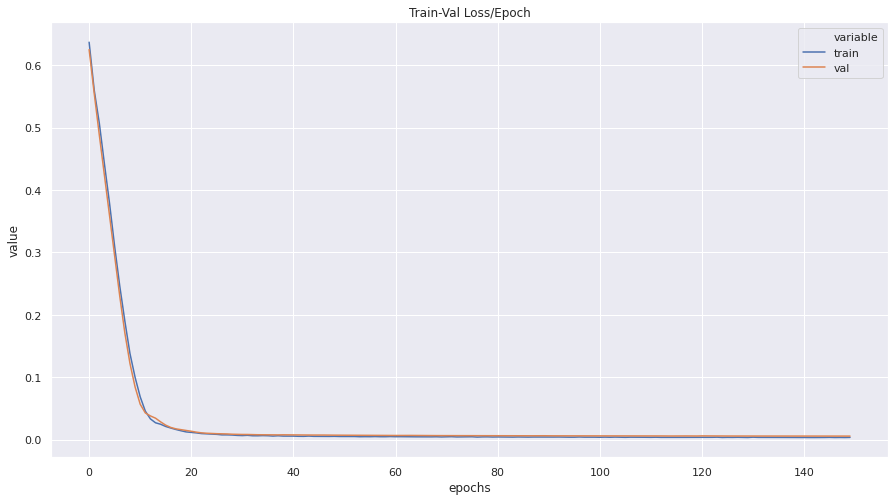

In [60]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [61]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_list))
r_square = r2_score(y_test, y_pred_list)
print("rmse :",rmse)
print("R^2 :",r_square)

rmse : 0.06429332892419605
R^2 : 0.7612236847785585
